In [1]:
import sys
sys.path.append('../')
import src.utils as utils
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
reload(utils)
import scipy.stats as stat

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
%config InlineBackend.figure_format = "retina"

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
np.random.seed(2)

## Euler simulation of BM
The impact of the step size

In [5]:
BM_1 = utils.BrownianMotion(T = 1, Nt = 5)
BM_2 = utils.BrownianMotion(T = 1, Nt = 50)
BM_3 = utils.BrownianMotion(T = 1, Nt = 500)

In [6]:
sims_1 = BM_1.simulate(nsims = 3)
time_1 = BM_1.timesteps

sims_2 = BM_2.simulate(nsims = 3)
time_2 = BM_2.timesteps

sims_3 = BM_3.simulate(nsims = 3)
time_3 = BM_3.timesteps

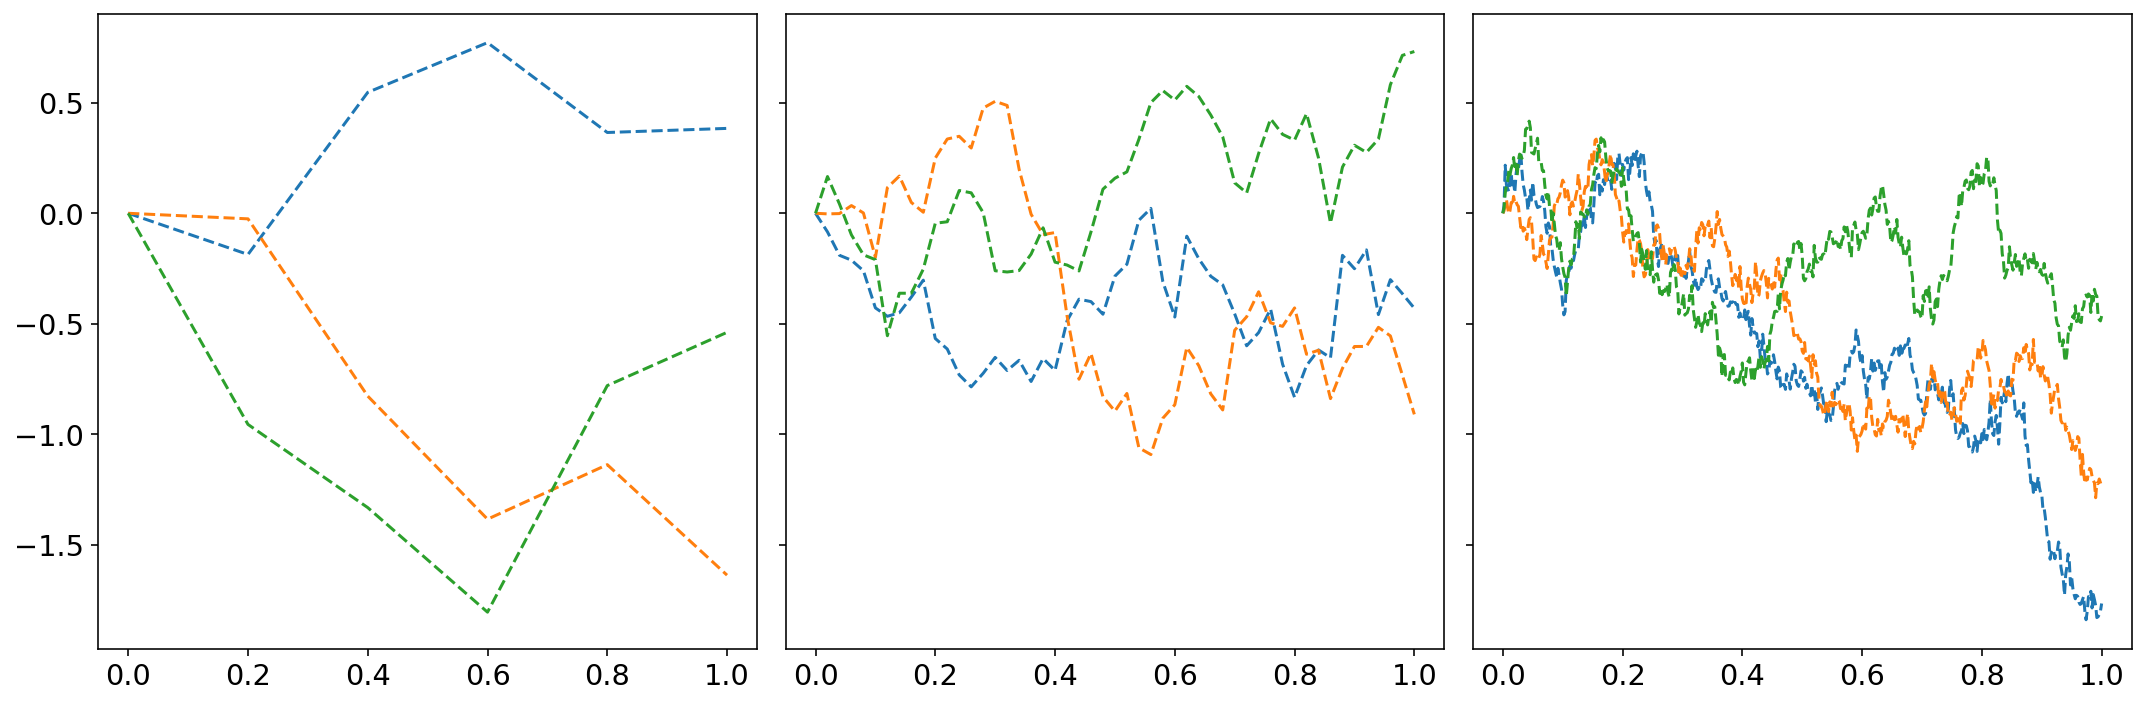

In [7]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(15, 5))
fig.tight_layout(pad=3)
ax[0].plot(time_1, sims_1, linestyle = '--')
ax[1].plot(time_2, sims_2, linestyle = '--')
ax[2].plot(time_3, sims_3, linestyle = '--')
resolution_value = 50
plt.tight_layout()
plt.savefig('../figures/impact_of_step_size.pdf', format="pdf", dpi=resolution_value)
plt.show()

## Chevichev's inequality

In [8]:
def indicator_g_K(x,K):
    return 1.0*(np.abs(x)>K)
def fct_x2_overK2(x,K):
    return (x**2) / (K**2)

In [9]:
K = 1
x = np.linspace(-2., 2., 1_000)

f1 = indicator_g_K(x,K)
f2 = fct_x2_overK2(x,K)

#idx = np.argwhere(np.abs(np.diff(f1))>0.99)
#f1[idx] = np.nan

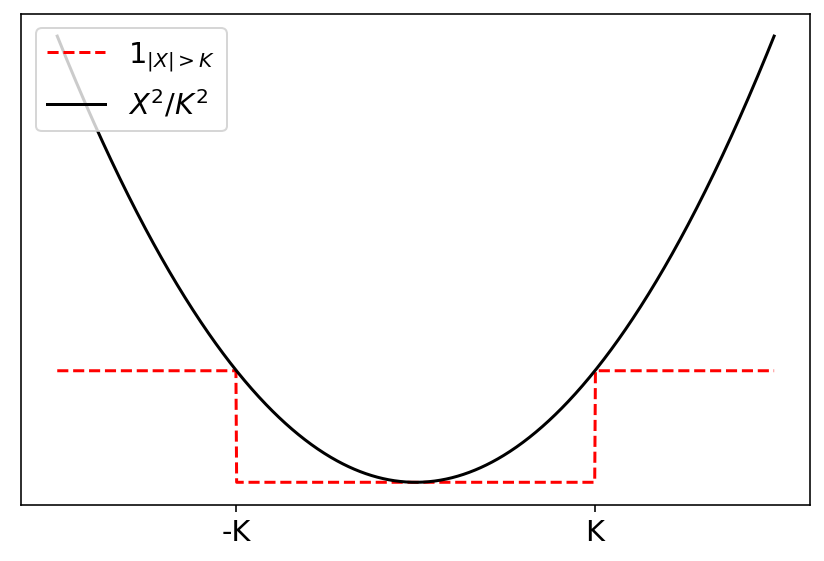

In [10]:
plt.figure()
plt.plot(x, f1, linestyle = '--', color = 'red')
plt.plot(x, f2, linestyle = '-', color='black')
resolution_value = 50
plt.tight_layout()
plt.xticks([-K,K], labels = ['-K','K'])
plt.yticks([])
plt.legend(['$1_{|X|>K}$','$X^2/K^2$'], loc='upper left')
plt.savefig('../figures/Chevichev_inequality.pdf', format="pdf", dpi=resolution_value)
plt.show()

## Quadratic variation

In [11]:
BM = utils.BrownianMotion(T = 1, Nt = 10_000)

In [12]:
path = BM.simulate(nsims=1)
diff = np.diff(path, axis = 0)
QV_proxy = np.sum(diff**2)
print('The proxy of the QV up to T = 1 is: ', QV_proxy)

The proxy of the QV up to T = 1 is:  1.0049824926023627


# Random Walk and Brownian motion
$$
W^{(n)}_t = \frac{1}{\sqrt{n}}\,R_{n\,t}
$$

In [13]:
n1 = 10.
n2 = 100.
n3 = 1000.
T = 1.

# The idea is to simulate a standard Random Walk in [0, n*T] and then scale it to create the approximation
# between [0,1]
RW_1 = utils.RandomWalk(p = 0.5, T = T*n1, Nt = int(T*n1*2))
RW_2 = utils.RandomWalk(p = 0.5, T = T*n2, Nt = int(T*n2*2))
RW_3 = utils.RandomWalk(p = 0.5, T = T*n3, Nt = int(T*n3*2))

time1 = RW_1.timesteps
time2 = RW_2.timesteps
time3 = RW_3.timesteps

sim1 = RW_1.simulate(nsims = 3)
sim2 = RW_2.simulate(nsims = 3)
sim3 = RW_3.simulate(nsims = 3)

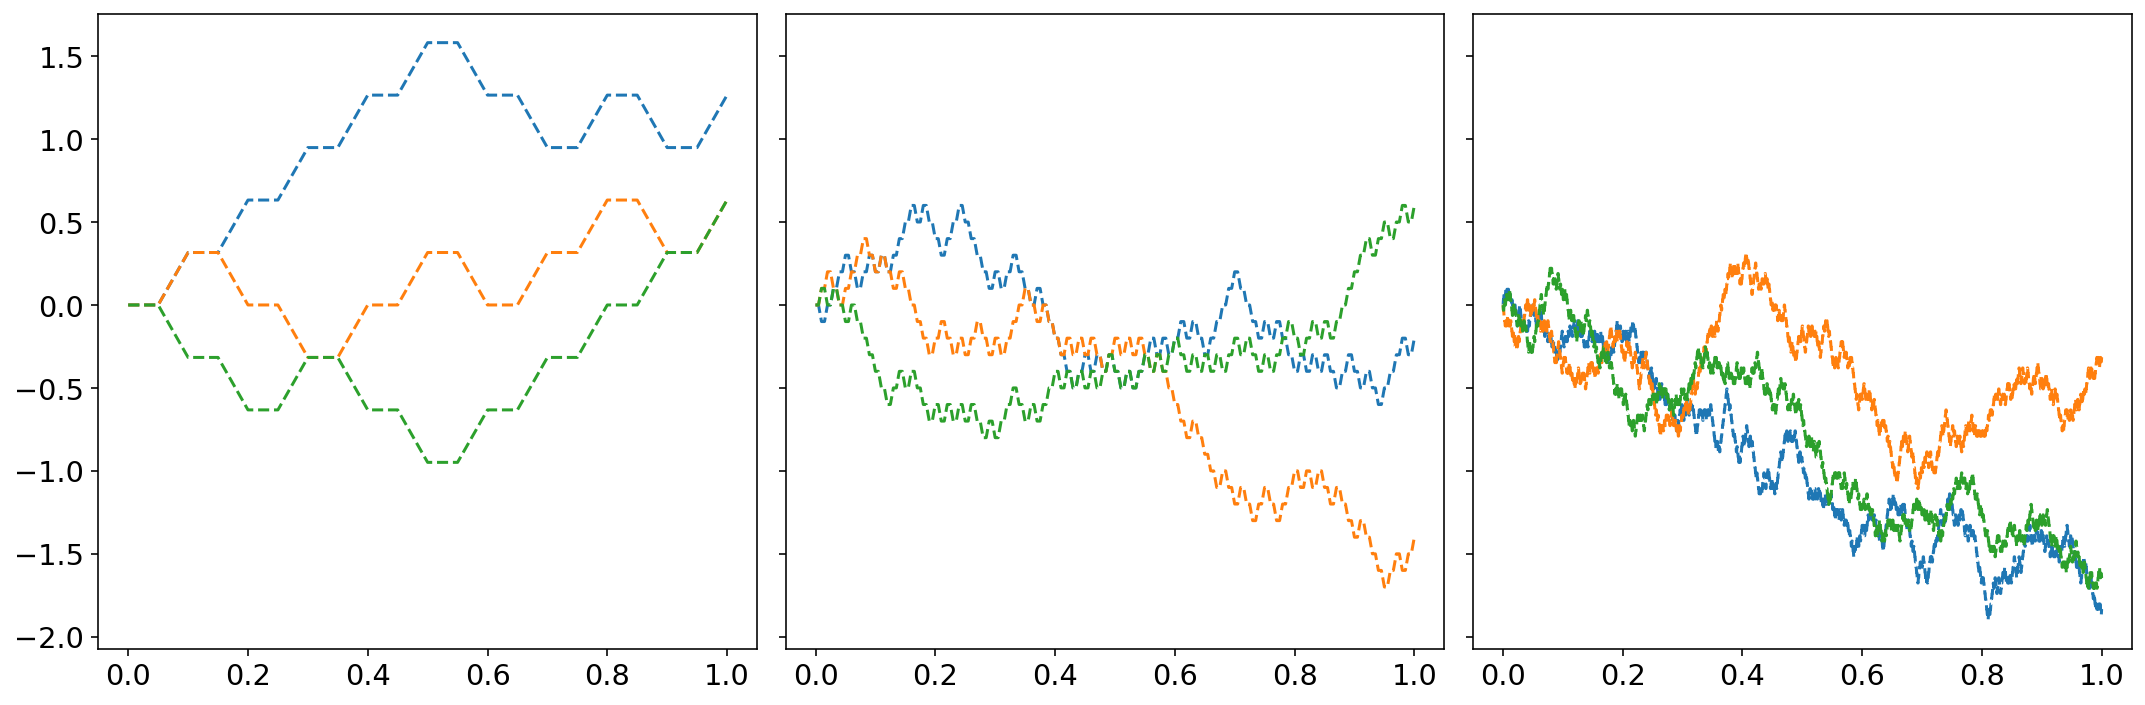

In [14]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(15, 5))
fig.tight_layout(pad=3)
ax[0].plot(time1/(T*n1), sim1/np.sqrt((T*n1)), linestyle = '--')
ax[1].plot(time2/(T*n2), sim2/np.sqrt((T*n2)), linestyle = '--')
ax[2].plot(time3/(T*n3), sim3/np.sqrt((T*n3)), linestyle = '--')
resolution_value = 50
plt.tight_layout()
plt.savefig('../figures/BM_as_limit_of_RW.pdf', format="pdf", dpi=resolution_value)
plt.show()

# Density and trajectory plot

In [15]:
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

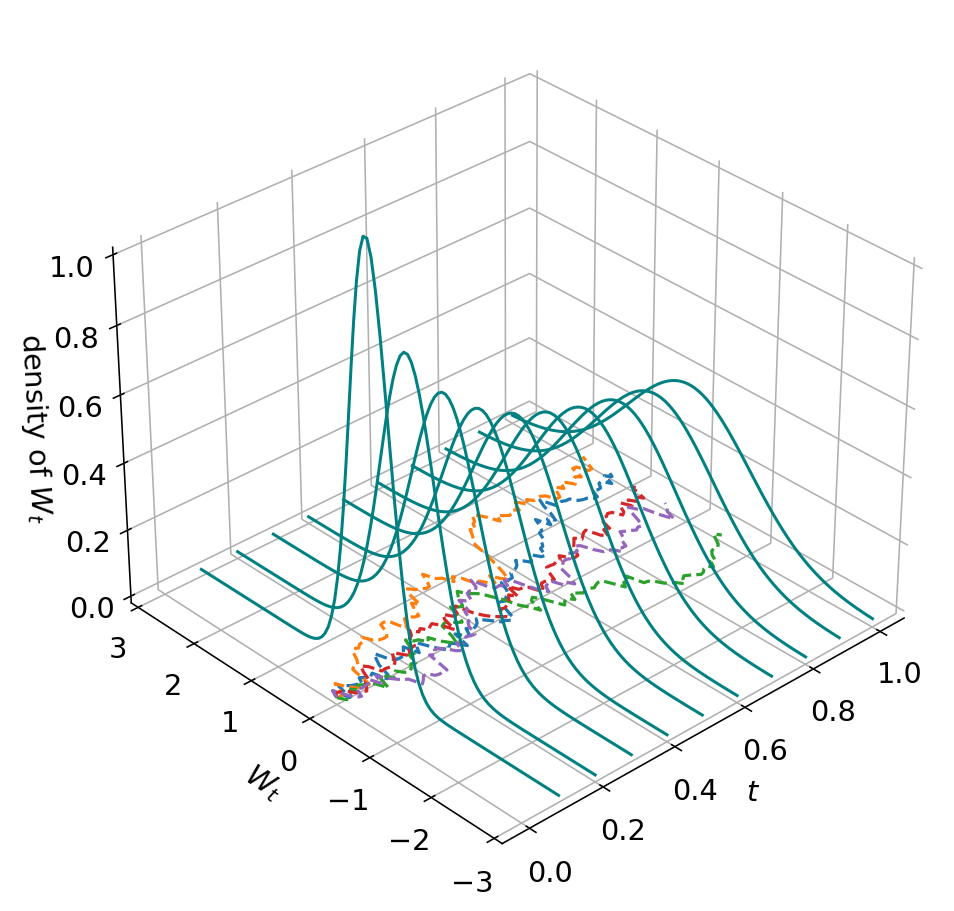

In [16]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

BM = utils.BrownianMotion(T = 1, Nt = 100)
sims = BM.simulate(nsims = 5)
time = BM.timesteps

N = 100
ones = np.ones(N)

T = np.linspace(0.1, 1, N)

ax.plot(time, sims,'--', linewidth=1.6)


time = np.arange(0.1, 1.1, 0.1)
for t in time:
    xnorm = np.linspace(-3, 3, N)
    ynorm = norm.pdf(xnorm, scale = np.sqrt(t))
    ax.plot(t * ones, xnorm, ynorm, color="teal", linewidth=1.5)

plt.gca().patch.set_facecolor('white')
ax.w_xaxis.set_pane_color((0, 0, 0, 0))
ax.w_yaxis.set_pane_color((0, 0, 0, 0))
ax.w_zaxis.set_pane_color((0, 0, 0, 0))

ax.set_ylim(-3., 3.)
ax.set_zlim(0, 1.)
ax.view_init(32, -133)

ax.set_xlabel("$t$")
ax.set_ylabel("$W_t$")
ax.set_zlabel("density of $W_t$")
plt.savefig("../figures/Brownian_motion_density_3d.pdf")
plt.show()
